# Guide for twinpy/analysis/shear_analyzer.py

In [7]:
%aiida
%reload_ext autoreload
%autoreload 2

In [77]:
import os
import sys
from pprint import pprint
import numpy as np
import twinpy
from twinpy.interfaces.aiida import AiidaRelaxWorkChain, AiidaPhonopyWorkChain, AiidaShearWorkChain, AiidaTwinBoudnaryRelaxWorkChain
from twinpy.analysis.shear_analyzer import ShearAnalyzer, TwinBoundaryShearAnalyzer
from twinpy.plot.band_structure import (get_seekpath,
                                        get_labels_for_twin,
                                        get_band_paths_from_labels,
                                        get_labels_band_paths_from_seekpath,
                                        BandsPlot)

jupyter_dir = os.path.join(os.path.dirname(twinpy.__file__), '..', 'jupyter')
sys.path.append(os.path.join(jupyter_dir, 'site-packages'))
from jupyter_help import show_info

# shear_pk = 309999  # twinpy Mg_pv
shear_pk = 315857  # twinpy Ti_pv

twinboundary_pk = 186343  # twinpy
additional_relax_pks = [267977, 279276, 282215, 283951]   # twinpy
twinboundary_phonon_pk = 286877  # twinpy
twinboundary_shear_relax_pks = [297874, 297890, 297907, 297924]
twinboundary_shear_phonon_pks = [299318, 300184, 300580, 300760]
shear_strain_ratios = [0.02, 0.04, 0.06, 0.08]


# class ShearAnalyzer

In [9]:
aiida_shear = AiidaShearWorkChain(load_node(shear_pk))
analyzer = aiida_shear.get_shear_analyzer()
show_info(analyzer, is_class=True)

====== START class information ======

# ---------
# docstring
# ---------

    Analize shear result.
    

# ----
# init
# ----

        Init.

        Args:
            shear_structure: ShearStructure class object.
            phonon_analyzers (list): List of PhononAnalyzer class object.

        Todo:
            Currently not supported the case the number of original_cells
            and input_cells changes because it is difficult to construct
            the relax cells in the original frame. But future fix this
            problem. One solution is to make attribute
            'self._original_primitive' which contains two atoms
            in the unit cell and original basis.
            Twinboundary shaer structure also use this class.
            If this is inconvenient, I have to create
            _BaseShaerAnalyzer, ShearAnalyzer TwinBoundaryShearAnalyzer
            classes separately.
        

# ---------------
# attribute names
# ---------------
['_relax_analyzers', '_p

## def get_shear_diffs

In [11]:
show_info(analyzer.get_shear_diffs)
print("# keys")
print(list(analyzer.get_shear_diffs().keys()))
print("")
print("# data")
pprint(analyzer.get_shear_diffs())

====== START method information ======

# ---------
# docstring
# ---------

        Get structure diffs between original relax and sheared relax cells
        IN ORIGINAL FRAME.
        

======= END method information =======


# keys
['lattice_diffs', 'scaled_posi_diffs', 'cart_posi_diffs', 'cart_norm_diffs']

# data
{'cart_norm_diffs': array([[0.        , 0.        ],
       [0.01507647, 0.02189648],
       [0.02908555, 0.04448815],
       [0.04182062, 0.06788723],
       [0.05394691, 0.09174356],
       [0.06642475, 0.11552429],
       [0.08039196, 0.13863191],
       [0.09676802, 0.16070285],
       [0.11650405, 0.18153066],
       [0.14103564, 0.20099603]]),
 'cart_posi_diffs': array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.0126551 , 0.00730642, 0.00371008],
        [0.00908033, 0.00524255, 0.01922288]],

       [[0.02440304, 0.0140891 , 0.0072082 ],
        [0.01906781, 0.01100883, 0.03865773]],

       [[0.03505302, 0.0

## def get_band_paths

In [12]:
show_info(analyzer.get_band_paths)
cell = analyzer.phonon_analyzers[0].primitive_cell
skp = get_seekpath(cell)
print("# You have to determine band paths for first cell.")
print("")
print("# twin labels")
pprint(get_labels_for_twin())
print("")
print("# seekpath output")
print("### path")
pprint(skp['path'])
print("")
print("### point coords")
pprint(skp['point_coords'])

# labels = ['GAMMA', 'M_2', 'L_2', 'A', '', 'GAMMA', 'K_2']
labels = ['GAMMA', 'M_1', 'L_1', 'A', '', 'GAMMA', 'K_1']
fixed_labels, band_paths = get_band_paths_from_labels(
                               labels=labels,
                               labels_qpoints=get_labels_for_twin())
print("")
print("Example:")
print("# labels")
print(labels)
print("")
print("# fixed labels")
print(fixed_labels)
print("")
print("# fixed labels, band_paths")
pprint(band_paths)

====== START method information ======

# ---------
# docstring
# ---------

        Get band paths for all shear cells from band paths for first cell.

        Args:
            base_band_paths (np.array): Path connections for first
                                             primitive standardized structure.

        Examples:
            >>> base_band_paths = [[[  0, 0, 0.5],
                                    [  0, 0, 0  ]],
                                   [[0.5, 0,   0],
                                    [0.5, 0, 0.5],
                                    [  0, 0, 0.5]]]

        Note:
            Get path_connections for each shear structure considering
            structure body rotation.
        

======= END method information =======


# You have to determine band paths for first cell.

# twin labels
{'A': [0, 0, 0.5],
 'GAMMA': [0, 0, 0],
 'H_1': [0.3333333333333333, 0.3333333333333333, 0.5],
 'H_2': [-0.3333333333333333, 0.6666666666666666, 0.5],
 'K_1': [0.3333333333

## def get_band_structures

====== START method information ======

# ---------
# docstring
# ---------

        Get BandStructure objects.

        Args:
            base_band_paths (np.array): Path connections for first
                                             primitive standardized structure.
            labels (list): Band labels for first band paths.
            npoints (int): The number of qpoints along the band path.
            with_eigenvectors (bool): If True, compute eigenvectors.

        Notes:
            Reciprocal lattices for each structure are set automatically.
            For more detail, see 'get_band_qpoints_and_path_connections'
            in phonopy.phonon.band_structure.
        

======= END method information =======




(<Figure size 576x432 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f26acf8b710>])

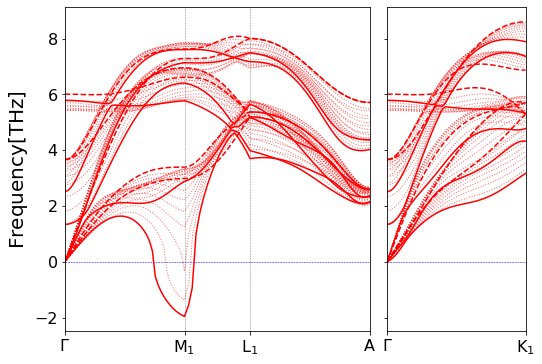

In [13]:
show_info(analyzer.get_band_structures)
band_structures = analyzer.get_band_structures(
    base_band_paths=band_paths,
    labels=fixed_labels,
    npoints=51,
    with_eigenvectors=False)
BandsPlot(band_structures).plot_band_structures()

# class TwinBoundaryShearAnalyzer

In [78]:
aiida_twinboundary_relax = AiidaTwinBoudnaryRelaxWorkChain(load_node(twinboundary_pk))
twinboundary_analyzer = aiida_twinboundary_relax.get_twinboundary_analyzer(
                            twinboundary_phonon_pk=twinboundary_phonon_pk,
                            additional_relax_pks=additional_relax_pks)

original_cells = []
for ratio in shear_strain_ratios:
    original_cell = twinboundary_analyzer.get_shear_cell(
        shear_strain_ratio=ratio,
        is_standardize=False)
    original_cells.append(original_cell)
    
phonon_analyzers = []
for i in range(len(original_cells)):
    aiida_relax = AiidaRelaxWorkChain(load_node(twinboundary_shear_relax_pks[i]))
    relax_analyzer = aiida_relax.get_relax_analyzer(original_cell=original_cells[i])
    aiida_phonon = AiidaPhonopyWorkChain(load_node(twinboundary_shear_phonon_pks[i]))
    phonon_analyzer = aiida_phonon.get_phonon_analyzer(relax_analyzer=relax_analyzer)
    phonon_analyzers.append(phonon_analyzer)

twinboundary_shear_analyzer = \
    twinboundary_analyzer.get_twinboundary_shear_analyzer(
        shear_phonon_analyzers=phonon_analyzers,
        shear_strain_ratios=shear_strain_ratios)

show_info(twinboundary_shear_analyzer, is_class=True)
print(twinboundary_shear_analyzer)

====== START class information ======

# ---------
# docstring
# ---------

    Analize twinboundary shear result.
    

# ----
# init
# ----

        Init.

        Args:
            phonon_analyzers (list): List of PhononAnalyzer class object.
        

# ---------------
# attribute names
# ---------------
['_relax_analyzers', '_phonon_analyzers', '_shear_strain_ratios']

# ------
# values
# ------
{'_phonon_analyzers': [<twinpy.analysis.phonon_analyzer.PhononAnalyzer object at 0x7f26a39903d0>,
 '_relax_analyzers': [<twinpy.analysis.relax_analyzer.RelaxAnalyzer object at 0x7f26a3993990>,
 '_shear_strain_ratios': [0.0, 0.02, 0.04, 0.06]}

======= END class information =======




## def get_atomic_environment

In [79]:
show_info(twinboundary_shear_analyzer.get_atomic_environment)
envs = twinboundary_shear_analyzer.get_atomic_environment()
print("# data num")
print(len(envs))
print("")
print("# first data")
pprint(envs[1])

====== START method information ======

# ---------
# docstring
# ---------

        Get plane coords from lower plane to upper plane.
        Return list of z coordinates of original cell frame.
        Plane coordinates (z coordinates) are fractional.
        

======= END method information =======


# data num
4

# first data
([0.7951914,
  2.86425702,
  4.65709629,
  6.56654847,
  8.43340317,
  10.30846918,
  12.18353519,
  14.05038989,
  15.95984207,
  17.75268134,
  19.82174697,
  21.41414238,
  23.47154975,
  25.28196867,
  27.18157337,
  29.0509287,
  30.92540754,
  32.79988638,
  34.66924171,
  36.56884641,
  38.37926533,
  40.4366727],
 [2.06906562,
  1.79283927,
  1.9094521799999997,
  1.8668547000000002,
  1.8750660099999994,
  1.8750660100000012,
  1.8668546999999993,
  1.9094521800000006,
  1.7928392699999982,
  2.0690656300000008,
  1.5923954100000017,
  2.05740737,
  1.81041892,
  1.8996046999999976,
  1.8693553300000012,
  1.8744788399999983,
  1.8744788399999983,
  1

## def plot_plane_diff

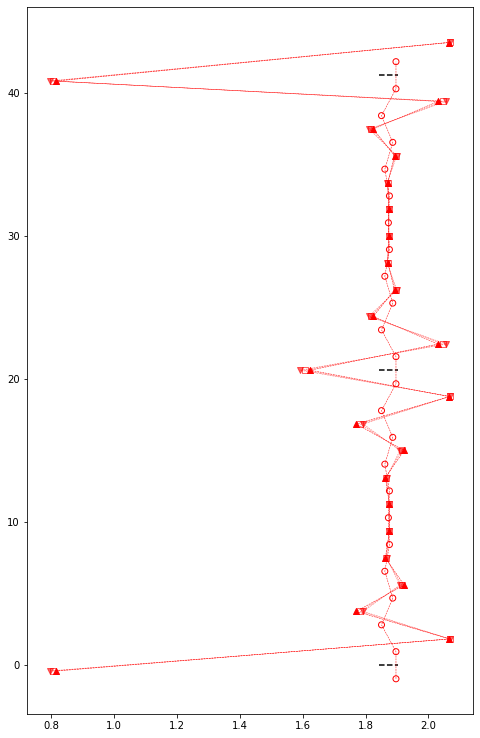

In [80]:
fig = twinboundary_shear_analyzer.plot_plane_diff()

## def plot_atom_diff

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


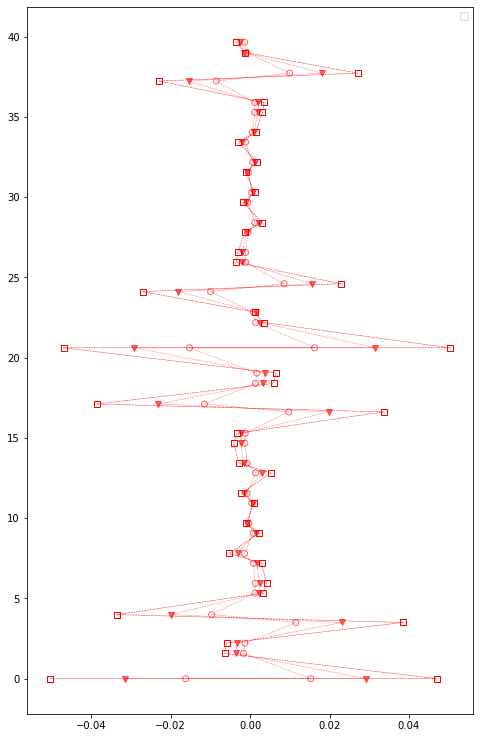

In [107]:
fig = twinboundary_shear_analyzer.plot_atom_diff(direction='z', shuffle=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


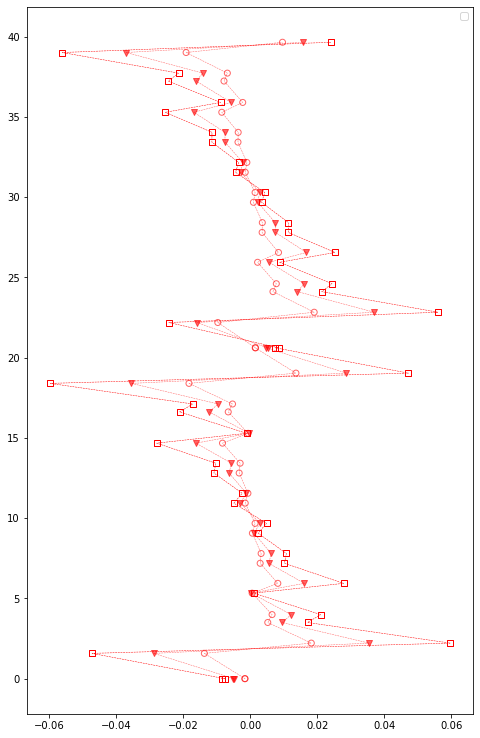

In [108]:
fig = twinboundary_shear_analyzer.plot_atom_diff(direction='y', shuffle=True)

In [53]:
]